# BIKE SHARING SYSTEM

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Reading and Understanding data

In [110]:
bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [111]:
bike.shape

(730, 16)

In [112]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [113]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### as we can see no null values are there so no need of cleaning the database

### a.) According to data dictionary weathersit and season are the categorical variables
#### weathersit : 
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
-  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
### NOTE: in weathersit i will be taking 1: clear,2: Mist,3: Light Snow,4: Fog  just for my reference and making it more readable
#### Season:
- 1:spring, 2:summer, 3:fall, 4:winter
### we will now convert these variables in to categorical data 

In [114]:
bike['weathersit']=bike['weathersit'].apply(lambda x:str(x))
varlist=['weathersit']
bike[varlist]=bike[varlist].apply(lambda x:x.map({"1":"clear","2":"Mist","3":"Light snow","4":"Fog"}))

In [115]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [116]:
bike['season']=bike['season'].apply(lambda x:str(x))
varlist1=['season']
bike[varlist1]=bike[varlist1].apply(lambda x:x.map({"1":"spring","2":"summer","3":"fall","4":"winter"}))

In [117]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [118]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(9), object(3)
memory usage: 91.3+ KB


## b.) now will seperate date as date,month and year  but here the concern is we are already having month and year as a column so no need of that so only separtae date from it


### 1. as we know we have weekday,year ,month in the data so there is no need of date column so we can drop it
### 2. casual+registered=cnt so we cann drop casual and registered columns also as we want to predict the demand of bikes irrespective of whether it was booked by casual or registered users.
### 3. instant column is also a only S.no so we can drop it also 

In [119]:
bike_output=bike.drop(['dteday'],axis=1)
bike_output=bike_output.drop(['casual','registered'],axis=1)
bike_output=bike_output.drop(['instant'],axis=1)

In [120]:
bike_output.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## 2. VISULAISING

### our TARGET VARIABLE : cnt should be related to some of the variables
- for numeric variables we will use pairplot
- for categorical data we will use boxplot
### a.) for numerical values

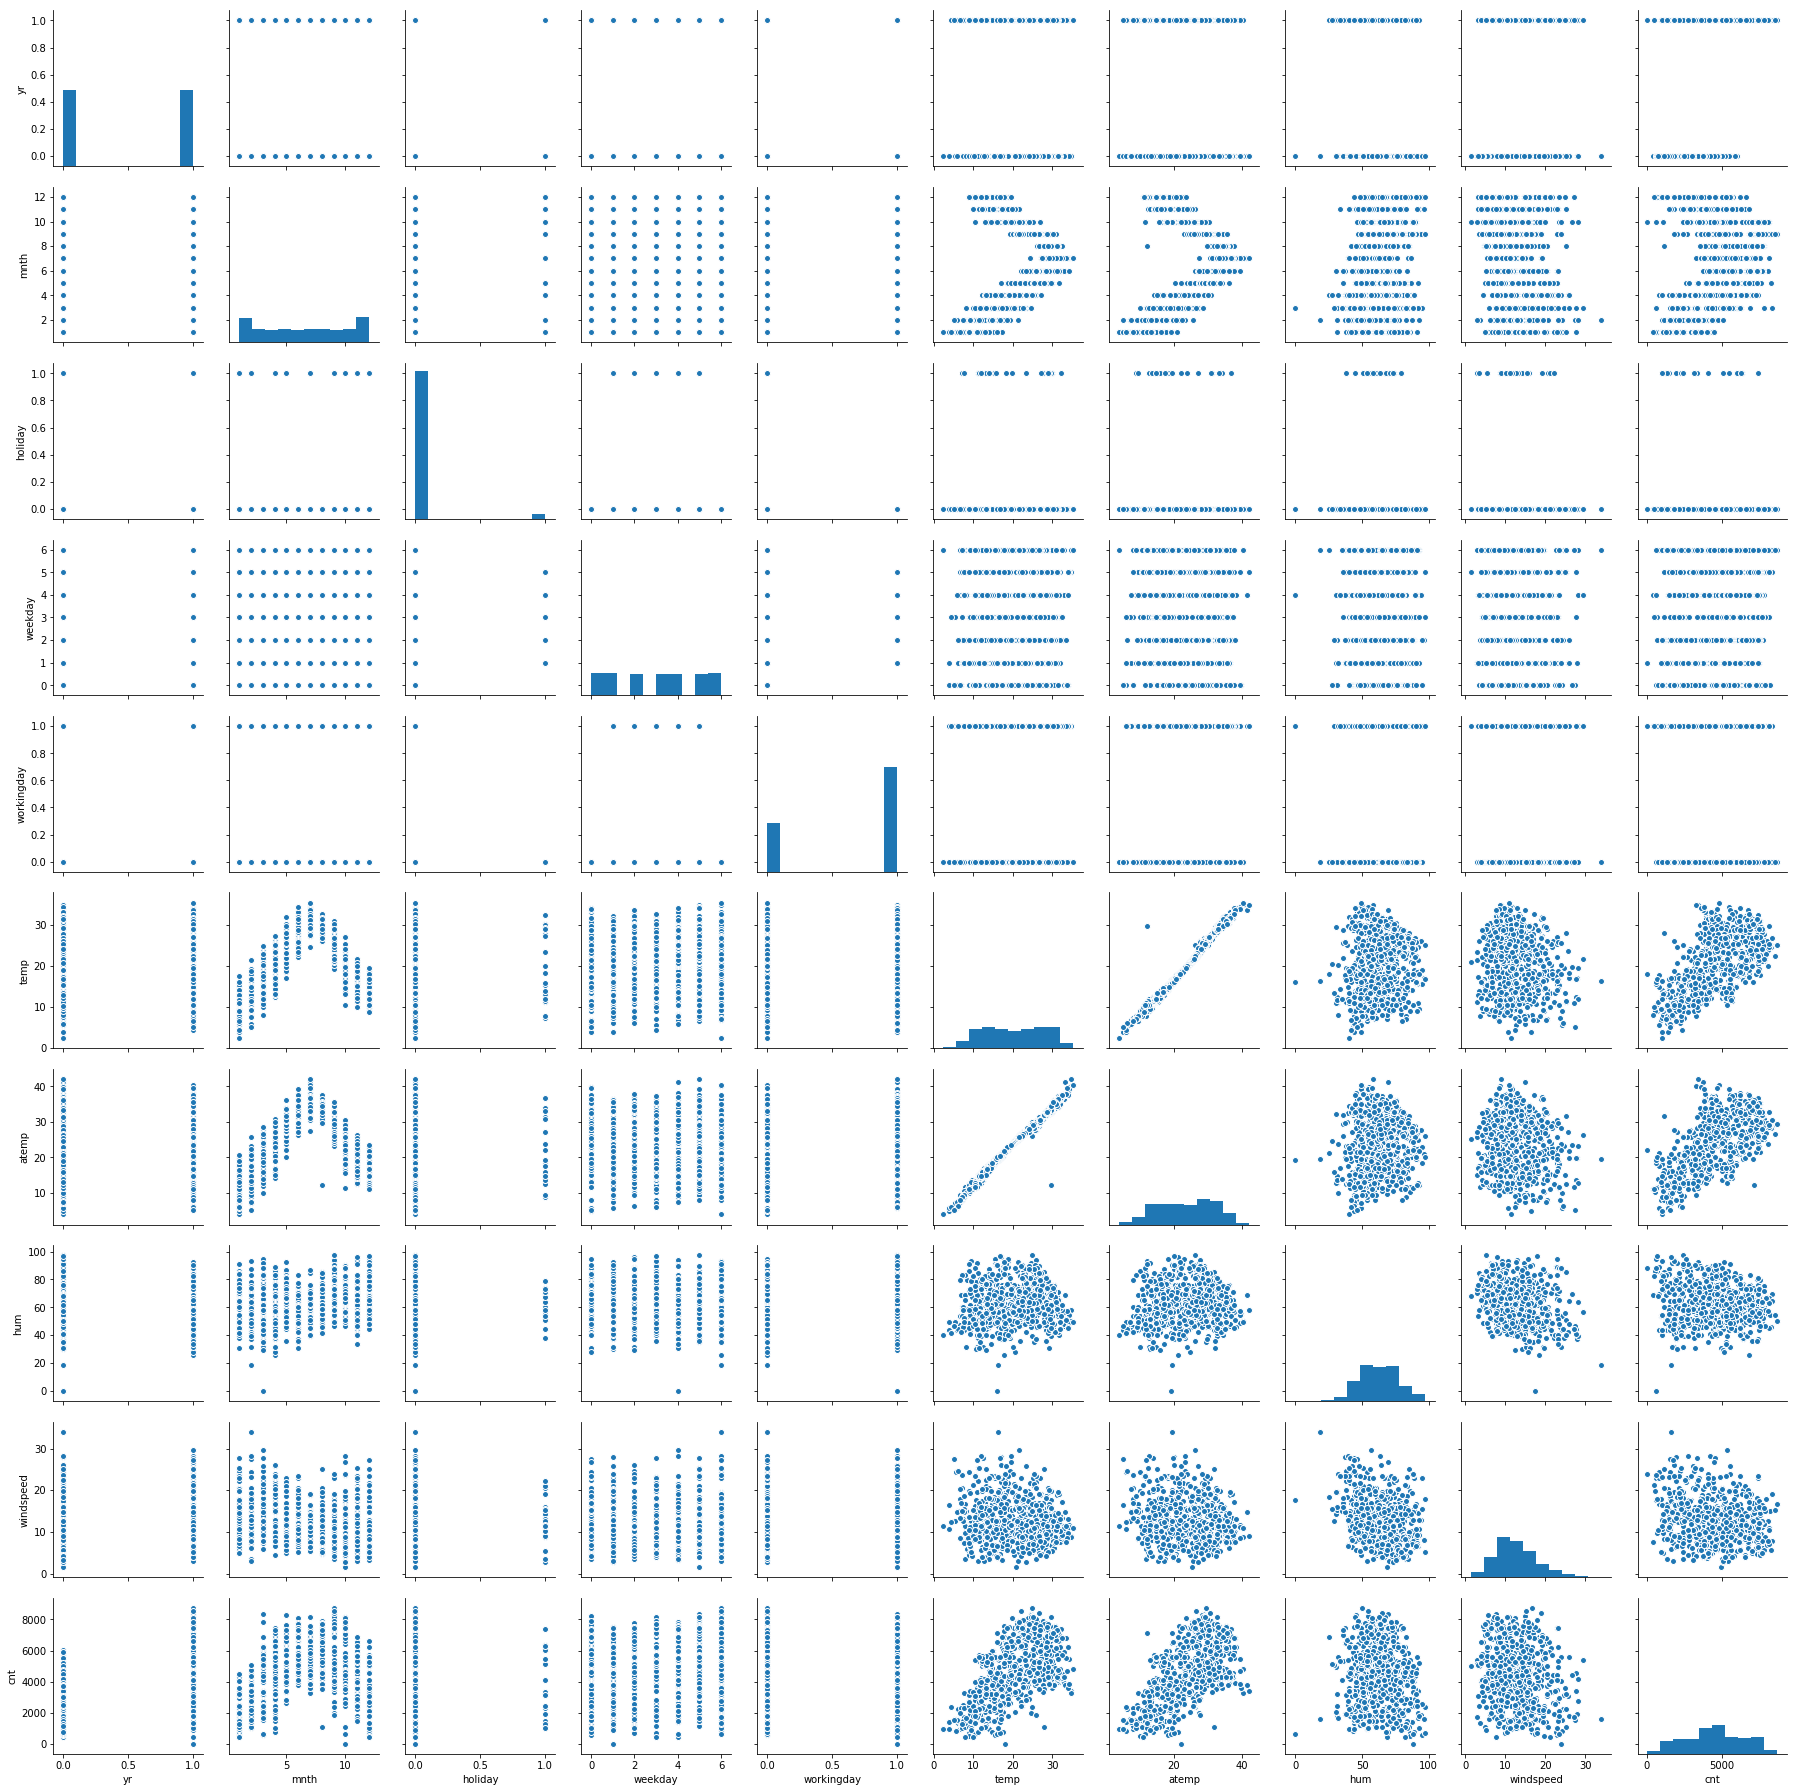

In [121]:
sns.pairplot(bike_output)
plt.show()

In [122]:
bike_output.corr()['cnt']

yr            0.569728
mnth          0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
temp          0.627044
atemp         0.630685
hum          -0.098543
windspeed    -0.235132
cnt           1.000000
Name: cnt, dtype: float64

### we can see that yr,mnth,temp,atemp are +ve correlated with cnt and windspeed is correlated with cnt but negatively 

In [123]:
bike_output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(6), object(2)
memory usage: 68.5+ KB


### b.) For categorical data 
#### we have 2 categorical data 
- season
- weathersit

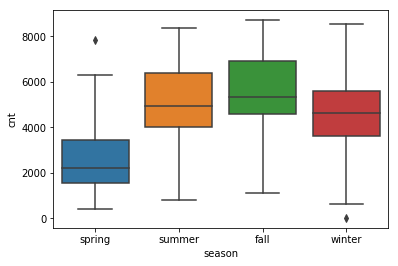

In [124]:
sns.boxplot(x='season',y='cnt',data=bike_output)
plt.show()

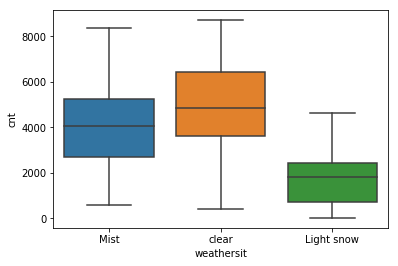

In [125]:
sns.boxplot(x='weathersit',y='cnt',data=bike_output)
plt.show()

### so categorical data is related with cnt we can see that from above 

## 3. DATA PREPARATION

- encoding(creating dummies and frequency encoding)
- spliting and scaling
### a.) encoding
#### we have 2 categorical variables 
- weathersit
- season
### weathersit has 4 values so we can keep three values but in the data we can see there are 3 values but in future we can get 4th value also so we will avoid drop_first in case of weather_sit but then we need to do drop_first=True

In [126]:
status=pd.get_dummies(bike_output['weathersit'],drop_first=True)
bike_output=pd.concat([bike_output,status],axis=1)

In [127]:
bike_output=bike_output.drop('weathersit',axis=1)

### season has 4 values do it will have 3 dummies values (1:spring, 2:summer, 3:fall, 4:winter)

In [128]:
status1=pd.get_dummies(bike_output['season'],drop_first=True)
bike_output=pd.concat([bike_output,status1],axis=1)

In [129]:
bike_output=bike_output.drop('season',axis=1)

In [130]:
bike_output.shape

(730, 15)

In [131]:
bike_output.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,1,0,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,1,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,1,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,1,0,0


In [132]:
bike_output.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.336986,0.634247,0.246575,0.252055,0.243836
std,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.473004,0.481971,0.431313,0.434490,0.429689
min,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### as we can see all the  colums have been describes and converted to numerical data 

### b.) spliting and scaling 
#### we are spliting the data in to 70:30 ratio

In [133]:
import sklearn 
from sklearn.model_selection import train_test_split

In [134]:
df_train,df_test=train_test_split(bike_output,train_size=0.7,random_state=100)

In [135]:
df_train.shape

(510, 15)

In [136]:
df_test.shape

(220, 15)

### If we see month and weekday they have distinct values with the range of 1-12 nad 0-6 respectively so we can do frequency encoding here rather than creating dummies 11 for month and 6 for weekday and increasing the data size

In [137]:
df_train.head()  

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter
576,1,7,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,0,0,0
426,1,3,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,1,0,0
728,1,12,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,1,0,0
482,1,4,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,1,0
111,0,4,0,5,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,0,1,0


In [138]:
fe=df_train.groupby('mnth').size()/len(df_train)
df_train['mnth']=df_train['mnth'].map(fe)

In [139]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter
576,1,0.076471,0,2,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,0,0,0
426,1,0.098039,0,6,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,1,0,0
728,1,0.084314,0,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,1,0,0
482,1,0.078431,0,6,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,1,0
111,0,0.078431,0,5,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,0,1,0


In [140]:
fe1=df_train.groupby('weekday').size()/len(df_train)
df_train['weekday']=df_train['weekday'].map(fe1)

In [141]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter
576,1,0.076471,0,0.131373,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,0,0,0
426,1,0.098039,0,0.154902,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,1,0,0
728,1,0.084314,0,0.143137,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,1,0,0
482,1,0.078431,0,0.154902,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,1,0
111,0,0.078431,0,0.127451,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,0,1,0


### if we see temp,hum,atemp are all on diff scale so we need to do scaling
####  Min-Max Scaling
- there is no need of doing scaling of categorical data as they are already been converted to 0 and 1's 
- numerical data are yr( but this is already in 0 and 1 form),holiday(already in form of 0 and 1),workingday(already in form of 0 and 1).
- we need to scale temp,hum,windspeed,atemp,cnt,mnth,weekday.

In [142]:
num_vars=['temp','atemp','hum','windspeed','cnt','mnth','weekday']

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [144]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [145]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.557353,0.025490,0.520588,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.345098,0.625490,0.243137,0.247059,0.247059
std,0.500429,0.262234,0.157763,0.366227,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.475867,0.484471,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.375000,0.000000,0.125000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.562500,0.000000,0.500000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.687500,0.000000,0.875000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


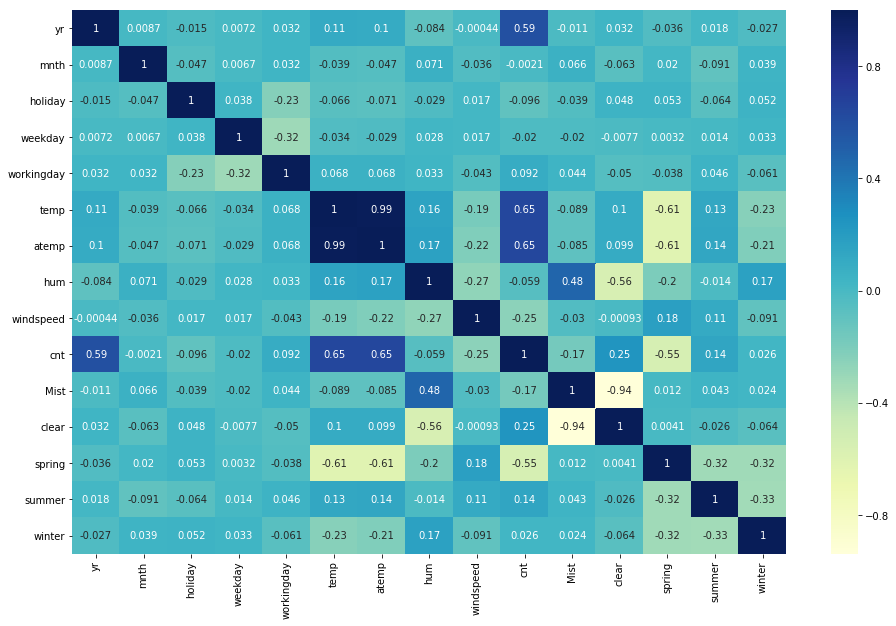

In [146]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## yr,temp,atemp seems to be related with cnt and temp and atemp are highly corr with each other so we will consider only one of them in our model building.
- now we will see by plotting scatter plot of these variables with cnt 

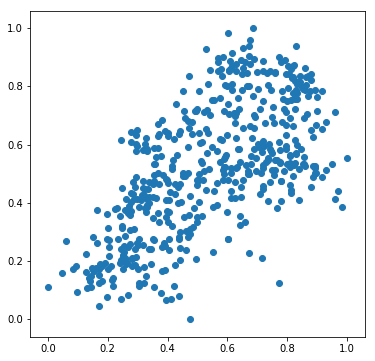

In [147]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [148]:
df_train.corr()['cnt']

yr            0.591433
mnth         -0.002145
holiday      -0.095948
weekday      -0.020251
workingday    0.092019
temp          0.645048
atemp         0.647944
hum          -0.058793
windspeed    -0.253038
cnt           1.000000
Mist         -0.169715
clear         0.245832
spring       -0.548987
summer        0.140259
winter        0.025945
Name: cnt, dtype: float64

## 4. MODEL BUILDING
### we will first start with automated approach(RFE) keeping the first 10 independent variables. and then apply manual approch(keep on removing one variable)to get the best model.


In [149]:
y_train=df_train.pop('cnt')

In [150]:
X_train=df_train

In [151]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm=lm.fit(X_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', False, 5),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Mist', True, 1),
 ('clear', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

## we will trust RFE and choose these 10 columns which are having 1 beside them

In [152]:
col=X_train.columns[rfe.support_]
X_train_rfe=X_train[col]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,Mist,clear,spring,summer,winter
576,1,0,0.815169,0.725633,0.264686,0,1,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,1,0,0
728,1,0,0.245101,0.498067,0.663106,0,1,1,0,0
482,1,0,0.395666,0.504508,0.188475,1,0,0,1,0
111,0,0,0.345824,0.751824,0.380981,1,0,0,1,0


In [153]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)
lm=sm.OLS(y_train,X_train_rfe)
lr_model=lm.fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          8.27e-183
Time:                        02:04:29   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0536      0.049      1.099      0.2

## from above we can see that all the variables has p value <0.05 so now we will check for VIF to check multicollinearity

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_new=X_train_rfe.drop('const',axis=1)
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Mist', 'clear', 'spring',
       'summer', 'winter'],
      dtype='object')

In [155]:
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values,i) for i in range(X_train_new.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
print(vif)

    Features    VIF
3        hum  23.68
2       temp  20.15
6      clear  13.97
5       Mist   8.69
7     spring   5.02
4  windspeed   4.60
9     winter   3.62
8     summer   2.54
0         yr   2.09
1    holiday   1.04


### let's check the model by removing humidity as it is having high vif value>5

In [156]:
X_train_new1 = X_train_rfe.drop(["hum"], axis = 1)
X_train_lm = sm.add_constant(X_train_new1)
X_train_lm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Mist', 'clear',
       'spring', 'summer', 'winter'],
      dtype='object')

In [157]:
lm1 = sm.OLS(y_train,X_train_lm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.84e-181
Time:                        02:04:40   Log-Likelihood:                 479.48
No. Observations:                 510   AIC:                            -939.0
Df Residuals:                     500   BIC:                            -896.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0563      0.038     -1.464      0.1

### now again we will check the VIF 

In [158]:
vif2=pd.DataFrame()
X_train_new_1=X_train_new1.drop('const',axis=1)
vif2['Features']=X_train_new_1.columns
vif2['VIF']=[variance_inflation_factor(X_train_new_1.values,i) for i in range(X_train_new_1.shape[1])]
vif2['VIF']=round(vif2['VIF'],2)
vif2=vif2.sort_values(by='VIF',ascending=False)
print(vif2)

    Features    VIF
5      clear  13.88
2       temp  11.54
4       Mist   7.78
3  windspeed   4.58
6     spring   3.75
8     winter   2.40
7     summer   2.22
0         yr   2.07
1    holiday   1.04


### now clear has teh highest VIF so we can drop that 

In [159]:
X_train_new3= X_train_new1.drop(["clear"], axis = 1)
X_train_linear_model= sm.add_constant(X_train_new3)
X_train_linear_model.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Mist', 'spring',
       'summer', 'winter'],
      dtype='object')

In [160]:
linear_model_1 = sm.OLS(y_train,X_train_linear_model).fit()
print(linear_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     222.4
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          1.70e-159
Time:                        02:04:46   Log-Likelihood:                 425.36
No. Observations:                 510   AIC:                            -832.7
Df Residuals:                     501   BIC:                            -794.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2067      0.033      6.227      0.0

### agin check the VIF

In [161]:
vif3=pd.DataFrame()
X_train_new_4=X_train_linear_model.drop('const',axis=1)
vif3['Features']=X_train_new_4.columns
vif3['VIF']=[variance_inflation_factor(X_train_new_4.values,i) for i in range(X_train_new_4.shape[1])]
vif3['VIF']=round(vif3['VIF'],2)
vif3=vif3.sort_values(by='VIF',ascending=False)
print(vif3)

    Features   VIF
3  windspeed  4.53
2       temp  3.56
0         yr  2.06
5     spring  1.95
6     summer  1.80
7     winter  1.59
4       Mist  1.51
1    holiday  1.04


### so all VIF's are under 5 and PIF values <0.05 so this model is fine so linear_model_1 is final

## 5. RESIDUAL ANALYSIS

#### 1. Error values must folloe normal distribution 

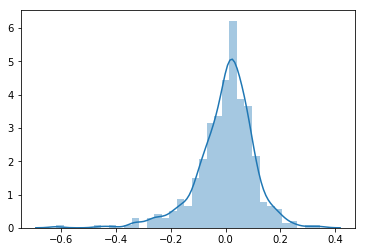

In [162]:
y_train_pred=linear_model_1.predict(X_train_linear_model)
residuals=y_train-y_train_pred
sns.distplot(residuals)
plt.show()

#### 2. Errors should be independent

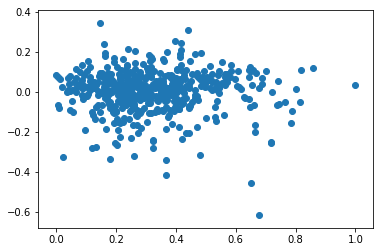

In [163]:
#print(X_train_new4)
plt.scatter(X_train_new3['windspeed'],residuals)

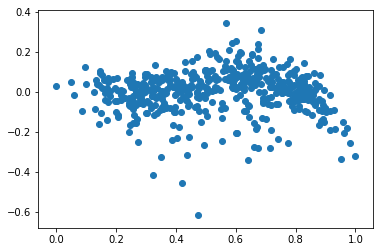

In [165]:
plt.scatter(X_train_new3['temp'],residuals)

## 6. TESTING THE MODEL

In [166]:
df_test.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'Mist', 'clear', 'spring', 'summer',
       'winter'],
      dtype='object')

### need to do frequency encoding in test data also of mnth and weekday column 

In [167]:
fe3=df_test.groupby('mnth').size()/len(df_test)
df_test['mnth']=df_test['mnth'].map(fe3)

In [168]:
fe4=df_test.groupby('weekday').size()/len(df_test)
df_test['weekday']=df_test['weekday'].map(fe4)

In [169]:
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter
184,0,0.104545,1,0.127273,0,29.793347,33.27085,63.7917,5.459106,6043,1,0,0,0,0
535,1,0.095455,0,0.100000,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,0,1,0
299,0,0.086364,0,0.163636,1,19.270000,22.85230,81.2917,13.250121,2659,1,0,0,0,1
221,0,0.059091,0,0.100000,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,0,0
152,0,0.095455,0,0.163636,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,1,0


### now we will do the scaling of test data 

In [170]:
num_vars_1=['temp','atemp','hum','windspeed','cnt','mnth','weekday']
df_test[num_vars_1]=scaler.transform(df_test[num_vars_1])
df_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Mist,clear,spring,summer,winter
184,0,1.207386,1,-0.005682,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,0,0
535,1,0.917614,0,-0.875000,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0
299,0,0.627841,0,1.153409,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1
221,0,-0.241477,0,-0.875000,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,0,0
152,0,0.917614,0,1.153409,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,1,0


In [171]:
y_test=df_test.pop('cnt')
X_test=df_test

In [172]:
X_test_sm=sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'Mist', 'clear', 'spring', 'summer',
       'winter'],
      dtype='object')

### now number of columns in train model and test should be same

In [173]:
X_test_sm=X_test_sm.drop(['mnth','weekday','workingday','atemp','hum','clear'],axis=1)

In [174]:
X_test_sm.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Mist', 'spring',
       'summer', 'winter'],
      dtype='object')

In [175]:
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 9 columns):
const        220 non-null float64
yr           220 non-null int64
holiday      220 non-null int64
temp         220 non-null float64
windspeed    220 non-null float64
Mist         220 non-null uint8
spring       220 non-null uint8
summer       220 non-null uint8
winter       220 non-null uint8
dtypes: float64(3), int64(2), uint8(4)
memory usage: 11.2 KB


In [177]:
y_test_pred=linear_model_1.predict(X_test_sm)

In [178]:
from sklearn.metrics import r2_score
r2=r2_score(y_true=y_test,y_pred=y_test_pred)
print(r2)

0.7749308360928323


## R square value of train model is 0.780 and test model is 0.774 so it's pretty close.

Text(0,0.5,'y_pred')

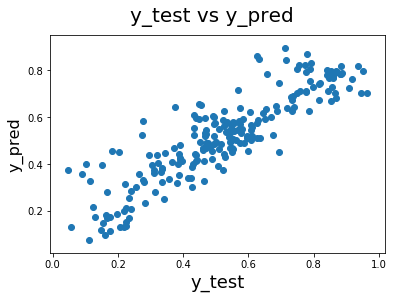

In [179]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

## We can see that the equation of our best fitted line is:

$ demand = 0.2395  \times  yr -0.0747  \times  holiday + 0.4787 \times temp - 0.1827 \times windspeed - 0.0622 \times Mist - 0.0725 \times spring + 0.0441 \times summer + 0.0673 \times winter $
